<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/IMDB_Sentiment_Classification_using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM

**Data Preprocessing**

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [5]:
x_train.shape

(25000, 100)

In [0]:
vocab_size = 20000
embadded_size = 128

**Build LSTM**

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, embadded_size, input_shape = (x_train.shape[1],)))
model.add(LSTM(60, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
196/196 [==============================] - 10s 50ms/step - loss: 0.4309 - accuracy: 0.7876 - val_loss: 0.3421 - val_accuracy: 0.8520
Epoch 2/5
196/196 [==============================] - 9s 46ms/step - loss: 0.2342 - accuracy: 0.9091 - val_loss: 0.3514 - val_accuracy: 0.8470
Epoch 3/5
196/196 [==============================] - 9s 47ms/step - loss: 0.1502 - accuracy: 0.9453 - val_loss: 0.4096 - val_accuracy: 0.8390
Epoch 4/5
196/196 [==============================] - 9s 48ms/step - loss: 0.0983 - accuracy: 0.9666 - val_loss: 0.5357 - val_accuracy: 0.8311
Epoch 5/5
196/196 [==============================] - 9s 48ms/step - loss: 0.0645 - accuracy: 0.9788 - val_loss: 0.5728 - val_accuracy: 0.8280


In [17]:
history.history

{'accuracy': [0.7876399755477905,
  0.9091200232505798,
  0.9453200101852417,
  0.9666000008583069,
  0.9788399934768677],
 'loss': [0.43088340759277344,
  0.2341618537902832,
  0.150241881608963,
  0.09832990169525146,
  0.06449353694915771],
 'val_accuracy': [0.8519600033760071,
  0.8469600081443787,
  0.8389599919319153,
  0.8311200141906738,
  0.8280400037765503],
 'val_loss': [0.3421158194541931,
  0.35137641429901123,
  0.40955930948257446,
  0.535650908946991,
  0.5727538466453552]}

In [0]:

def plot_learningCurve(history, epoch):
  #plot training accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'], loc = 'upper left')
  plt.show()
  #plot taining loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()


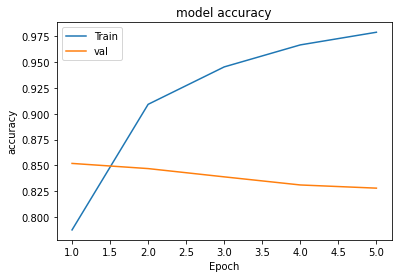

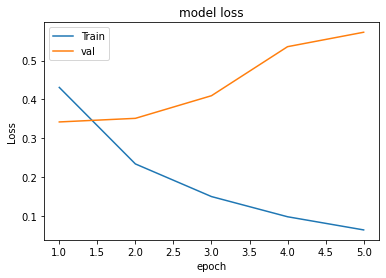

In [20]:
plot_learningCurve(history, 5)